In [1]:
import os 
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import lmfit
from uncertainties import wrap
from uncertainties import ufloat

In [2]:
def pos(x):
    for i in range(len(data[0])):
        if data[0,i]>=x:
            return i
            break

In [3]:
res = Path("Results/total_drücke.txt")
res.touch()
nf = open(res,"w")
nf.write("p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,13")

41

In [4]:
cominitial = np.array([1e-5, 8.6e-6, 7.4e-6, 6.3e-6, 5.4e-6, 4.6e-6, 4.0e-6, 3.4e-6, 3e-6, 2.5e-6, 2.2e-6, 1.5e-6, 1e-6])*0.750062
com = [cominitial]
comerr=[]
for i in range(len(com[0])):
    comerr.append(com[0][i]*0.3)
com.append(comerr)
com = np.array(com)

Messfehler der partialdrücke in %

In [5]:
data=[[],[]]
for i in os.listdir('Data'):
    path = 'Data/'+i
    with open(path, mode='r') as tf:
        dataex = np.genfromtxt((line.replace(',', '.') for line in tf),delimiter=";",skip_header=21).T        
        data[0].append(np.mean(dataex[4]))
        data[1].append(np.std(dataex[4]))
data=np.array(data)


mederr=[]
for i in range(len(data[0])):
    mederr.append(data[1,i]/data[0,i]*100)
print(np.mean(mederr))

0.5339589887826315


In [14]:
print("combivac")
for i in range(len(com[1])):
    print(str(com[0,i])+'+/-'+str(com[1,i]))

print("total")
for i in range(len(data[1])):
    print(str(data[0,i])+'+/-'+str(data[0,i]*0.05))

combivac
7.50062e-06+/-2.250186e-06
6.4505332000000005e-06+/-1.93515996e-06
5.5504588e-06+/-1.66513764e-06
4.7253906e-06+/-1.41761718e-06
4.0503348e-06+/-1.21510044e-06
3.4502852e-06+/-1.03508556e-06
3.0002479999999997e-06+/-9.000743999999999e-07
2.5502108e-06+/-7.650632399999999e-07
2.250186e-06+/-6.750558e-07
1.875155e-06+/-5.625465e-07
1.6501364e-06+/-4.9504092e-07
1.125093e-06+/-3.375279e-07
7.500619999999999e-07+/-2.2501859999999996e-07
total
2.6854707504690433e-07+/-1.3427353752345217e-08
2.2762053547671843e-07+/-1.1381026773835923e-08
1.8771477044476329e-07+/-9.385738522238165e-09
1.549130286944046e-07+/-7.74565143472023e-09
1.3321933208255158e-07+/-6.660966604127579e-09
1.1091749530956848e-07+/-5.545874765478424e-09
8.160305099778271e-08+/-4.080152549889136e-09
6.628857723577236e-08+/-3.314428861788618e-09
5.6567948780487806e-08+/-2.8283974390243906e-09
4.539712195121951e-08+/-2.2698560975609755e-09
3.922776422764227e-08+/-1.961388211382114e-09
3.299294634146341e-08+/-1.6496473

13


<ErrorbarContainer object of 3 artists>

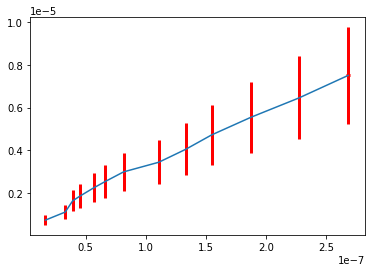

In [7]:
print(len(com[1]))
plt.errorbar(y=com[0],x=data[0],yerr=com[1],xerr=data[1],ecolor="r",elinewidth=3)


In [8]:
model_lin = lmfit.models.LinearModel()
pars_lin = model_lin.guess(data=com[0],x=data[0])
out_lin =  model_lin.fit(com[0],x=data[0],params=pars_lin,nan_policy='propagate',weights=1/com[1])

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 13
    # variables        = 2
    chi-square         = 1.21839972
    reduced chi-square = 0.11076361
    Akaike info crit   = -26.7763439
    Bayesian info crit = -25.6464452
[[Variables]]
    slope:      28.9165104 +/- 1.35855572 (4.70%) (init = 26.06237)
    intercept:  3.2882e-07 +/- 7.3044e-08 (22.21%) (init = 6.061455e-07)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.726


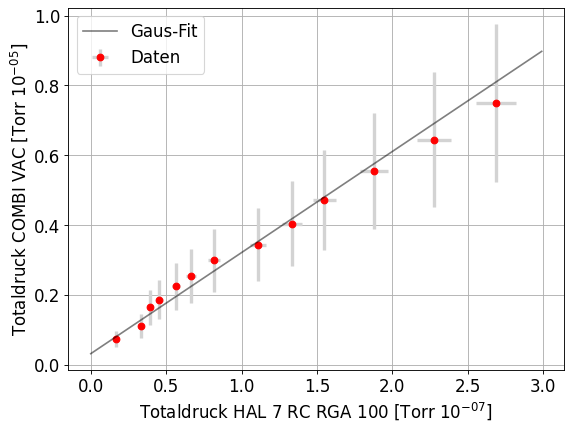

In [10]:
v = 0
b = 3e-7
von = pos(v)
bis = pos(b)

yscale = 1e5
xscale = 1e7

fig = plt.figure(figsize=(8,6),dpi=80,linewidth=50)
plt.rc ('font', size = 15) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = 15) # Schriftgröße des Titels
plt.rc ('axes', labelsize = 15) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = 15) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 15) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = 15) #Schriftgröße der Legende

plt.errorbar(x=xscale*data[0],y=yscale*com[0],xerr=xscale*data[0]*0.05,yerr=yscale*com[1],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=5,label="Daten")
plt.plot(xscale*np.arange(v,b,1e-9),yscale*out_lin.eval(x=np.arange(v,b,1e-9)),zorder=10,color='k',linestyle='-',alpha=0.5,label="Gaus-Fit")

plt.ylabel('Totaldruck COMBI VAC [Torr $10^{'+str(1/yscale).split("e")[1]+'}$]')
plt.xlabel('Totaldruck HAL 7 RC RGA 100 [Torr $10^{'+str(1/xscale).split("e")[1]+'}$]')
plt.grid()
plt.legend()
plt.savefig('Results/lin_fit.pdf')
print(out_lin.fit_report())